In [30]:
%matplotlib notebook
import click
import numpy as np
from scipy import stats
from math import ceil
import h5py
from copy import deepcopy
from utils import analyze_slice, get_binary_input_patterns
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from generate_figures import import_slice_data, import_dynamic_activity, plot_cumulative_sparsity, plot_cumulative_selectivity, plot_cumulative_discriminability

In [31]:
data_file_path='data/20240226_exported_data_dentate_circuit_learning.hdf5'

In [32]:
dynamics_file_path='data/20240220_144648_exported_model_data_dynamics.hdf5'

In [33]:
model_seed='1234'

In [34]:
    _,num_units_history_dict,_,_,weight_history_dict, network_activity_history_dict, sparsity_history_dict, \
        similarity_matrix_history_dict, selectivity_history_dict,fraction_active_patterns_history_dict,\
        _ = import_slice_data(data_file_path)
    network_activity_dynamics_history_dict =  import_dynamic_activity(dynamics_file_path)

In [35]:
color_dict={'log_normal_init_no_learning' : 'k', 
            'log_normal_init_plain_Hebb' : 'g',
            'log_normal_init_Hebb_weight_norm' : 'b',
            'uniform_init_no_learning' : 'cyan',
            'uniform_init_plain_Hebb' : 'purple',
            'uniform_init_Hebb_weight_norm' : 'orange'
           }

In [39]:
label_dict={'log_normal_init_no_learning' : 'log normal init\nno learning', 
            'log_normal_init_plain_Hebb' : 'log normal init\nplain Hebb',
            'log_normal_init_Hebb_weight_norm' : 'log normal init\nHebb weight norm',
            'uniform_init_no_learning' : 'uniform init\nno learning',
            'uniform_init_plain_Hebb' : 'uniform init\nplain Hebb',
            'uniform_init_Hebb_weight_norm' : 'uniform init\nHebb weight norm'}

<IPython.core.display.Javascript object>


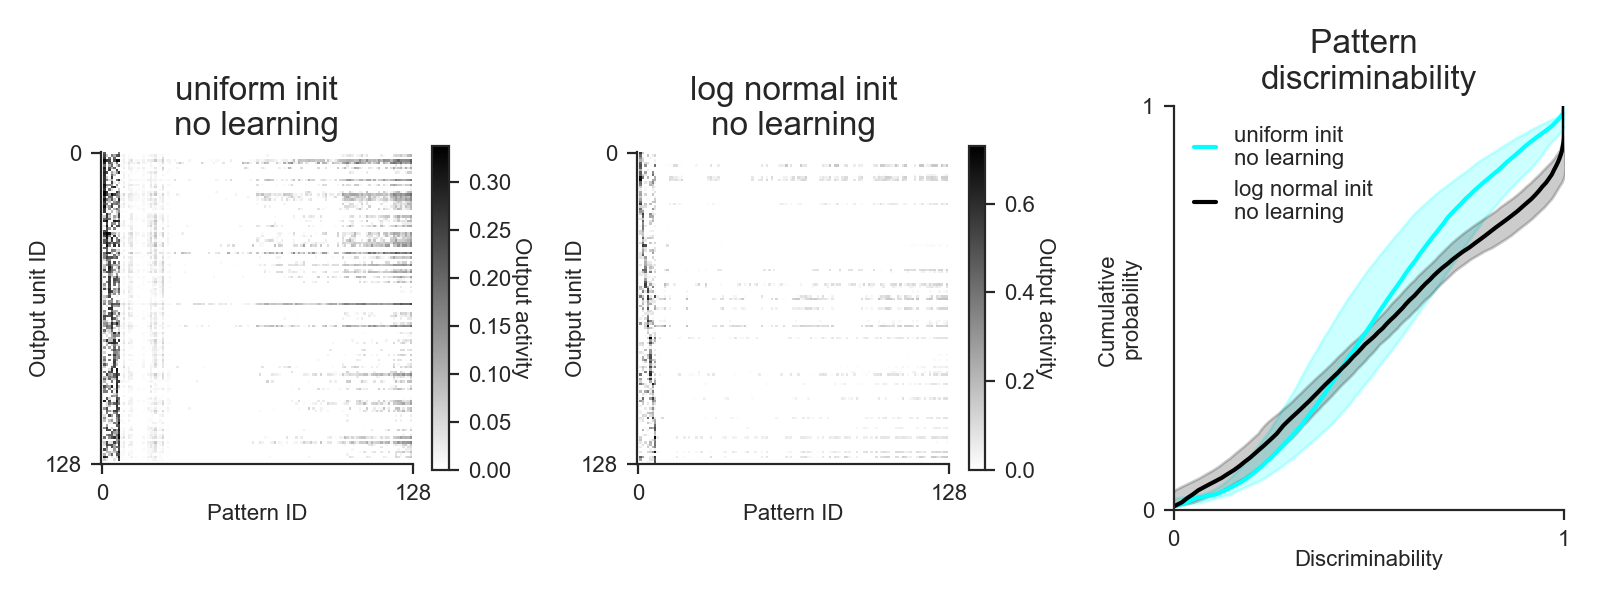

In [50]:

mm = 1 / 25.4  # millimeters to inches
fig, axes = plt.subplots(1, 3, figsize=(8, 3))


fontsize = 8
description_list = ['uniform_init_no_learning', 'log_normal_init_no_learning']

# Output activity for FF, FB, FF+FB
num_output_units = num_units_history_dict['log_normal_init_no_learning'][model_seed]['Output']
for i,description in enumerate(description_list):
    ax = axes[i]
    output_activity = network_activity_history_dict[description][model_seed]['Output']
    argmax_indices = np.argmax(output_activity, axis=0)
    sorted_indices = np.argsort(argmax_indices)
    im = ax.imshow(output_activity[:, sorted_indices].transpose(), aspect='equal', cmap='binary',interpolation="nearest")
    ax.set_xticks([0, num_output_units])
    ax.set_yticks([0, num_output_units])
    ax.set_xlabel('Pattern ID',fontsize=fontsize,labelpad=0)
    ax.set_ylabel('Output unit ID',fontsize=fontsize,labelpad=-2)
    ax.tick_params(labelsize=fontsize)
    ax.set_title(label_dict[description])
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Output activity', rotation=270, labelpad=7, fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)

#Similarity matrix
# num_patterns = 2**num_units_history_dict['log_normal_init_no_learning'][model_seed]['Input']
# for i,description in enumerate(description_list):
#     ax = fig.add_subplot(axes[i, 2])
#     similarity_matrix = similarity_matrix_history_dict[description][model_seed]['Output']
#     im = ax.imshow(similarity_matrix, aspect='equal', cmap='viridis',vmin=0, vmax=1,interpolation="nearest")
#     ax.set_xticks([0, num_output_units])
#     ax.set_yticks([0, num_output_units])
#     ax.set_xlabel('Pattern ID',fontsize=fontsize,labelpad=0)
#     ax.set_ylabel('Pattern ID',fontsize=fontsize ,labelpad=-2)
#     ax.tick_params(labelsize=fontsize)
#     cbar = plt.colorbar(im, ax=ax, ticks=[0, 1])
#     cbar.set_label('Cosine similarity', rotation=270, labelpad=7, fontsize=fontsize)
#     cbar.ax.tick_params(labelsize=fontsize)
# fig.tight_layout()
# fig = plt.figure()
# axes = gs.GridSpec(nrows=3, ncols=1,
#                    left=0.05,right=0.98,
#                    top = 0.95, bottom = 0.2,
#                    wspace=0.8, hspace=1.2)

#Cumulative distribution for sparsity (1 - fraction active)

# ax = fig.add_subplot(axes[0])
# cumulative_sparsity_dict = {}
# for description in description_list:
#     cumulative_sparsity, mean_sparsity, cdf_prob_bins, SD = plot_cumulative_sparsity(sparsity_history_dict[description])
#     cumulative_sparsity_dict[description] = cumulative_sparsity
#     ax.plot(mean_sparsity, cdf_prob_bins, label=label_dict[description],color=color_dict[description])
#     error_min = mean_sparsity - SD
#     error_max = mean_sparsity + SD
#     ax.fill_betweenx(cdf_prob_bins, error_min, error_max, alpha=0.2,color=color_dict[description])
# ax.tick_params(labelsize=fontsize)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_xticks([0, 1])
# ax.set_yticks([0, 1])
# ax.set_xlabel('Sparsity',fontsize=fontsize,labelpad=0)
# ax.set_ylabel('Cumulative \nprobability',fontsize=fontsize,labelpad=0)

# s, p1 = stats.ks_2samp(cumulative_sparsity_dict['Input-Output-lognormal'],
#                       cumulative_sparsity_dict['FF_Inh'])
# s, p2 = stats.ks_2samp(cumulative_sparsity_dict['Input-Output-lognormal'],
#                       cumulative_sparsity_dict['FF_Inh_no_sel_loss'])
# s, p3 = stats.ks_2samp(cumulative_sparsity_dict['FF_Inh'],
#                       cumulative_sparsity_dict['FF_Inh_no_sel_loss'])
# median_lognormal = np.median(cumulative_sparsity_dict['Input-Output-lognormal'])
# median_FFinh = np.median(cumulative_sparsity_dict['FF_Inh'])
# median_FFinh_NoSel = np.median(cumulative_sparsity_dict['FF_Inh_no_sel_loss'])
# path_to_file = 'ks_tests.txt'
# mode = 'a' if os.path.exists(path_to_file) else 'w'
# with open(path_to_file, mode) as f:
#     f.write("\nFig3 Sparsity Stats:"
#             f"\nMedian - lognormal{median_lognormal}; FF Inh: {median_FFinh}; No selectivity:{median_FFinh_NoSel}"
#             f"\nLognormal Vs FF Inh: p = {p1}"
#             f"\nLognormal Vs FF No selectivity: p = {p2}"
#             f"\nFF Inh Vs FF No selectivity: p = {p3}")

#Cumulative distribution for selectivity
# ax = fig.add_subplot(axes[1])
# cumulative_selectivity_dict = {}
# for description in description_list:
#     cumulative_selectivity, mean_selectivity, cdf_prob_bins, SD = plot_cumulative_selectivity(selectivity_history_dict[description])
#     cumulative_selectivity_dict[description] = cumulative_selectivity
#     ax.plot(mean_selectivity, cdf_prob_bins, label=label_dict[description],color=color_dict[description])
#     error_min = mean_selectivity - SD
#     error_max = mean_selectivity + SD
#     ax.fill_betweenx(cdf_prob_bins, error_min, error_max,alpha=0.2,color=color_dict[description])
# ax.tick_params(labelsize=fontsize)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_xticks([0, 1])
# ax.set_yticks([0, 1])
# ax.set_xlabel('Selectivity',fontsize=fontsize,labelpad=0)
# ax.set_ylabel('Cumulative \nprobability',fontsize=fontsize,labelpad=0)
# ax.legend(loc='best',frameon=False,fontsize=fontsize,handlelength=1)

# s, p1 = stats.ks_2samp(cumulative_selectivity_dict['Input-Output-lognormal'],
#                       cumulative_selectivity_dict['FF_Inh'])
# s, p2 = stats.ks_2samp(cumulative_selectivity_dict['Input-Output-lognormal'],
#                       cumulative_selectivity_dict['FF_Inh_no_sel_loss'])
# s, p3 = stats.ks_2samp(cumulative_selectivity_dict['FF_Inh'],
#                       cumulative_selectivity_dict['FF_Inh_no_sel_loss'])
# with open(path_to_file, 'a') as f:
#     f.write("\nFig3 Selectivity Stats:"
#             f"\nLognormal Vs FF Inh: p = {p1}"
#             f"\nLognormal Vs FF No selectivity: p = {p2}"
#             f"\nFF Inh Vs FF No selectivity: p = {p3}")

#Cumulative distribution for discriminability
ax = axes[2]
cumulative_discriminability_dict = {}
for description in description_list:
    cumulative_discriminability, mean_discriminability, cdf_prob_bins, SD = plot_cumulative_discriminability(similarity_matrix_history_dict[description])
    cumulative_discriminability_dict[description] = cumulative_discriminability
    ax.plot(mean_discriminability, cdf_prob_bins, label=label_dict[description],color=color_dict[description])
    error_min = mean_discriminability - SD
    error_max = mean_discriminability + SD
    ax.fill_betweenx(cdf_prob_bins, error_min, error_max,alpha=0.2,color=color_dict[description])
ax.tick_params(labelsize=fontsize)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Discriminability',fontsize=fontsize,labelpad=0)
ax.set_ylabel('Cumulative \nprobability',fontsize=fontsize,labelpad=0)
ax.set_title('Pattern \ndiscriminability')
ax.legend(loc='best',frameon=False,fontsize=fontsize,handlelength=1)
fig.tight_layout()


# s, p1 = stats.ks_2samp(cumulative_discriminability_dict['Input-Output-lognormal'],
#                       cumulative_discriminability_dict['FF_Inh'])
# s, p2 = stats.ks_2samp(cumulative_discriminability_dict['Input-Output-lognormal'],
#                       cumulative_discriminability_dict['FF_Inh_no_sel_loss'])
# s, p3 = stats.ks_2samp(cumulative_discriminability_dict['FF_Inh'],
#                       cumulative_discriminability_dict['FF_Inh_no_sel_loss'])
# with open(path_to_file, 'a') as f:
#     f.write("\nFig3 Discriminability Stats:"
#             f"\nLognormal Vs FF Inh: p = {p1}"
#             f"\nLognormal Vs FF No selectivity: p = {p2}"
#             f"\nFF Inh Vs FF No selectivity: p = {p3}\n")



sns.despine()
fig.savefig('figures/Figure1_learning_02282024.svg', edgecolor='white', dpi=300, facecolor='white', transparent=True)
fig.savefig('figures/Figure1_learning_02282024.png', edgecolor='white', dpi=300, facecolor='white', transparent=True)


<IPython.core.display.Javascript object>


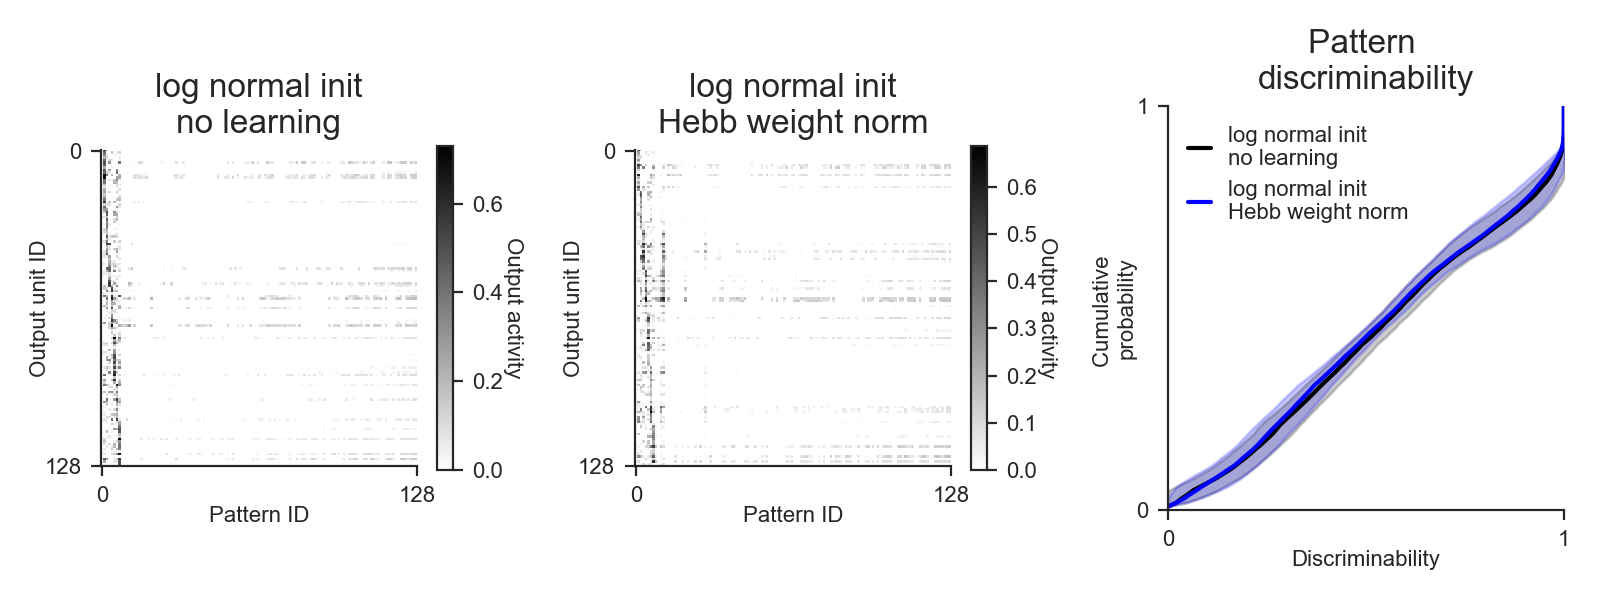

In [51]:

mm = 1 / 25.4  # millimeters to inches
fig, axes = plt.subplots(1, 3, figsize=(8, 3))


fontsize = 8
description_list = ['log_normal_init_no_learning', 'log_normal_init_Hebb_weight_norm']

# Output activity for FF, FB, FF+FB
num_output_units = num_units_history_dict['log_normal_init_no_learning'][model_seed]['Output']
for i,description in enumerate(description_list):
    ax = axes[i]
    output_activity = network_activity_history_dict[description][model_seed]['Output']
    argmax_indices = np.argmax(output_activity, axis=0)
    sorted_indices = np.argsort(argmax_indices)
    im = ax.imshow(output_activity[:, sorted_indices].transpose(), aspect='equal', cmap='binary',interpolation="nearest")
    ax.set_xticks([0, num_output_units])
    ax.set_yticks([0, num_output_units])
    ax.set_xlabel('Pattern ID',fontsize=fontsize,labelpad=0)
    ax.set_ylabel('Output unit ID',fontsize=fontsize,labelpad=-2)
    ax.tick_params(labelsize=fontsize)
    ax.set_title(label_dict[description])
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Output activity', rotation=270, labelpad=7, fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)

#Similarity matrix
# num_patterns = 2**num_units_history_dict['log_normal_init_no_learning'][model_seed]['Input']
# for i,description in enumerate(description_list):
#     ax = fig.add_subplot(axes[i, 2])
#     similarity_matrix = similarity_matrix_history_dict[description][model_seed]['Output']
#     im = ax.imshow(similarity_matrix, aspect='equal', cmap='viridis',vmin=0, vmax=1,interpolation="nearest")
#     ax.set_xticks([0, num_output_units])
#     ax.set_yticks([0, num_output_units])
#     ax.set_xlabel('Pattern ID',fontsize=fontsize,labelpad=0)
#     ax.set_ylabel('Pattern ID',fontsize=fontsize ,labelpad=-2)
#     ax.tick_params(labelsize=fontsize)
#     cbar = plt.colorbar(im, ax=ax, ticks=[0, 1])
#     cbar.set_label('Cosine similarity', rotation=270, labelpad=7, fontsize=fontsize)
#     cbar.ax.tick_params(labelsize=fontsize)
# fig.tight_layout()
# fig = plt.figure()
# axes = gs.GridSpec(nrows=3, ncols=1,
#                    left=0.05,right=0.98,
#                    top = 0.95, bottom = 0.2,
#                    wspace=0.8, hspace=1.2)

#Cumulative distribution for sparsity (1 - fraction active)

# ax = fig.add_subplot(axes[0])
# cumulative_sparsity_dict = {}
# for description in description_list:
#     cumulative_sparsity, mean_sparsity, cdf_prob_bins, SD = plot_cumulative_sparsity(sparsity_history_dict[description])
#     cumulative_sparsity_dict[description] = cumulative_sparsity
#     ax.plot(mean_sparsity, cdf_prob_bins, label=label_dict[description],color=color_dict[description])
#     error_min = mean_sparsity - SD
#     error_max = mean_sparsity + SD
#     ax.fill_betweenx(cdf_prob_bins, error_min, error_max, alpha=0.2,color=color_dict[description])
# ax.tick_params(labelsize=fontsize)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_xticks([0, 1])
# ax.set_yticks([0, 1])
# ax.set_xlabel('Sparsity',fontsize=fontsize,labelpad=0)
# ax.set_ylabel('Cumulative \nprobability',fontsize=fontsize,labelpad=0)

# s, p1 = stats.ks_2samp(cumulative_sparsity_dict['Input-Output-lognormal'],
#                       cumulative_sparsity_dict['FF_Inh'])
# s, p2 = stats.ks_2samp(cumulative_sparsity_dict['Input-Output-lognormal'],
#                       cumulative_sparsity_dict['FF_Inh_no_sel_loss'])
# s, p3 = stats.ks_2samp(cumulative_sparsity_dict['FF_Inh'],
#                       cumulative_sparsity_dict['FF_Inh_no_sel_loss'])
# median_lognormal = np.median(cumulative_sparsity_dict['Input-Output-lognormal'])
# median_FFinh = np.median(cumulative_sparsity_dict['FF_Inh'])
# median_FFinh_NoSel = np.median(cumulative_sparsity_dict['FF_Inh_no_sel_loss'])
# path_to_file = 'ks_tests.txt'
# mode = 'a' if os.path.exists(path_to_file) else 'w'
# with open(path_to_file, mode) as f:
#     f.write("\nFig3 Sparsity Stats:"
#             f"\nMedian - lognormal{median_lognormal}; FF Inh: {median_FFinh}; No selectivity:{median_FFinh_NoSel}"
#             f"\nLognormal Vs FF Inh: p = {p1}"
#             f"\nLognormal Vs FF No selectivity: p = {p2}"
#             f"\nFF Inh Vs FF No selectivity: p = {p3}")

#Cumulative distribution for selectivity
# ax = fig.add_subplot(axes[1])
# cumulative_selectivity_dict = {}
# for description in description_list:
#     cumulative_selectivity, mean_selectivity, cdf_prob_bins, SD = plot_cumulative_selectivity(selectivity_history_dict[description])
#     cumulative_selectivity_dict[description] = cumulative_selectivity
#     ax.plot(mean_selectivity, cdf_prob_bins, label=label_dict[description],color=color_dict[description])
#     error_min = mean_selectivity - SD
#     error_max = mean_selectivity + SD
#     ax.fill_betweenx(cdf_prob_bins, error_min, error_max,alpha=0.2,color=color_dict[description])
# ax.tick_params(labelsize=fontsize)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_xticks([0, 1])
# ax.set_yticks([0, 1])
# ax.set_xlabel('Selectivity',fontsize=fontsize,labelpad=0)
# ax.set_ylabel('Cumulative \nprobability',fontsize=fontsize,labelpad=0)
# ax.legend(loc='best',frameon=False,fontsize=fontsize,handlelength=1)

# s, p1 = stats.ks_2samp(cumulative_selectivity_dict['Input-Output-lognormal'],
#                       cumulative_selectivity_dict['FF_Inh'])
# s, p2 = stats.ks_2samp(cumulative_selectivity_dict['Input-Output-lognormal'],
#                       cumulative_selectivity_dict['FF_Inh_no_sel_loss'])
# s, p3 = stats.ks_2samp(cumulative_selectivity_dict['FF_Inh'],
#                       cumulative_selectivity_dict['FF_Inh_no_sel_loss'])
# with open(path_to_file, 'a') as f:
#     f.write("\nFig3 Selectivity Stats:"
#             f"\nLognormal Vs FF Inh: p = {p1}"
#             f"\nLognormal Vs FF No selectivity: p = {p2}"
#             f"\nFF Inh Vs FF No selectivity: p = {p3}")

#Cumulative distribution for discriminability
ax = axes[2]
cumulative_discriminability_dict = {}
for description in description_list:
    cumulative_discriminability, mean_discriminability, cdf_prob_bins, SD = plot_cumulative_discriminability(similarity_matrix_history_dict[description])
    cumulative_discriminability_dict[description] = cumulative_discriminability
    ax.plot(mean_discriminability, cdf_prob_bins, label=label_dict[description],color=color_dict[description])
    error_min = mean_discriminability - SD
    error_max = mean_discriminability + SD
    ax.fill_betweenx(cdf_prob_bins, error_min, error_max,alpha=0.2,color=color_dict[description])
ax.tick_params(labelsize=fontsize)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Discriminability',fontsize=fontsize,labelpad=0)
ax.set_ylabel('Cumulative \nprobability',fontsize=fontsize,labelpad=0)
ax.set_title('Pattern \ndiscriminability')
ax.legend(loc='best',frameon=False,fontsize=fontsize,handlelength=1)
fig.tight_layout()


# s, p1 = stats.ks_2samp(cumulative_discriminability_dict['Input-Output-lognormal'],
#                       cumulative_discriminability_dict['FF_Inh'])
# s, p2 = stats.ks_2samp(cumulative_discriminability_dict['Input-Output-lognormal'],
#                       cumulative_discriminability_dict['FF_Inh_no_sel_loss'])
# s, p3 = stats.ks_2samp(cumulative_discriminability_dict['FF_Inh'],
#                       cumulative_discriminability_dict['FF_Inh_no_sel_loss'])
# with open(path_to_file, 'a') as f:
#     f.write("\nFig3 Discriminability Stats:"
#             f"\nLognormal Vs FF Inh: p = {p1}"
#             f"\nLognormal Vs FF No selectivity: p = {p2}"
#             f"\nFF Inh Vs FF No selectivity: p = {p3}\n")



sns.despine()
fig.savefig('figures/Figure2_learning_02282024.svg', edgecolor='white', dpi=300, facecolor='white', transparent=True)
fig.savefig('figures/Figure2_learning_02282024.png', edgecolor='white', dpi=300, facecolor='white', transparent=True)
